In [1]:
# Import libraries and modules needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Pull the csv file in and convert it to a Pandas DataFrame

nba_mvp_history = pd.read_csv("Datasets/mvps_stats_all_seasons_revised.csv")
nba_mvp_history.head()

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,0,1996-97,1,Karl Malone,PF,33,82,36.6,27.4,4.5,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1,1996-97,2,Michael Jordan,SG,33,82,37.9,29.6,4.3,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,2,1996-97,3,Grant Hill,SF,24,80,39.3,21.4,7.3,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,3,1996-97,4,Tim Hardaway,PG,30,81,38.7,20.3,8.6,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,4,1996-97,5,Glen Rice,SF,29,79,42.6,26.8,2.0,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0


In [3]:
# Drop unncessary columns from DataFrame

nba_mvp_history.drop(columns = ['Unnamed: 0', 'Rank', 'Pos'], inplace = True)

In [4]:
# Display DataFrame

nba_mvp_history

,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,1996-97,Karl Malone,33,82,36.6,27.4,4.5,9.9,1.4,0.6,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1996-97,Michael Jordan,33,82,37.9,29.6,4.3,5.9,1.7,0.5,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,1996-97,Grant Hill,24,80,39.3,21.4,7.3,9.0,1.8,0.6,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,1996-97,Tim Hardaway,30,81,38.7,20.3,8.6,3.4,1.9,0.1,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,1996-97,Glen Rice,29,79,42.6,26.8,2.0,4.0,0.9,0.3,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2022-23,Stephen Curry,34,56,34.7,29.4,6.3,6.1,0.9,0.4,...,0.614,0.915,2.1,7.8,0.192,0,5,1000,0.005,0
394,2022-23,Jimmy Butler,33,64,33.4,22.9,5.3,5.9,1.8,0.3,...,0.560,0.850,1.3,12.3,0.277,0,3,1000,0.003,0
395,2022-23,De'Aaron Fox,25,73,33.4,25.0,6.1,4.2,1.1,0.3,...,0.557,0.780,2.4,7.4,0.146,0,2,1000,0.002,0
396,2022-23,Jalen Brunson,26,68,35.0,24.0,6.2,3.5,0.9,0.2,...,0.547,0.829,2.2,8.7,0.175,0,1,1000,0.001,0


In [5]:
# Age column was reading as a string, convert it to a numeric

nba_mvp_history['Age'] = pd.to_numeric(nba_mvp_history['Age'], errors='coerce')

In [6]:
# Features and Targets for correlation between Stats vs First Place Points, Total Points Won, Point Share

columns = ['Age', 'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48']
target = 'First'
target2 = 'Pts Won'
target3 = 'Share'

# Features and Target for correlation between Stats vs MVP/Non-MVP
target4 = 'MVP'

In [7]:
# Create a fucntion to make heatmaps for correlations. Display heatmaps with top_n features

def correlation_heatmap(col, x, y, top_n, path):
    df = nba_mvp_history[col + [x]]
    df

    corr_matrix = df.corr()
    corr_w_target = corr_matrix[x]
    
    top_features = corr_w_target.abs().sort_values(ascending = False).head(top_n).index

    plt.figure(figsize = (10,5))
    sns.heatmap(corr_matrix.loc[top_features, top_features], annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
    plt.title(f"Top {top_n} Features vs {y} Correlation")
    plt.savefig(path)
    plt.show()

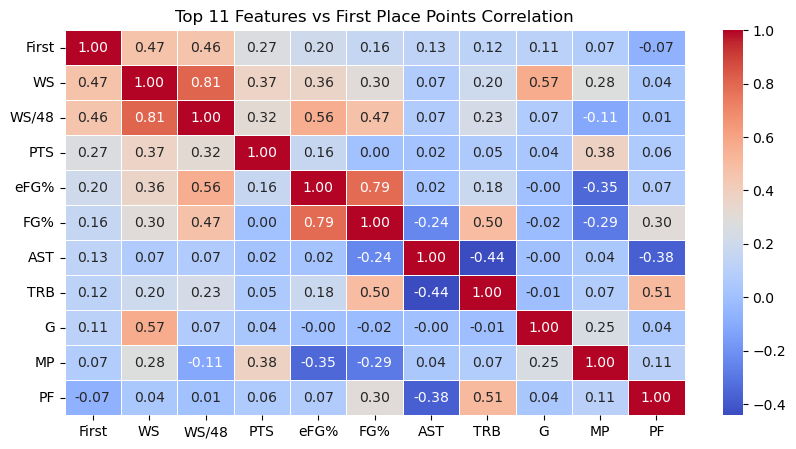

In [8]:
# Stats vs First Place Points Correlation

correlation_heatmap(col = columns, x = target, y = 'First Place Points', top_n = 11, path = "Charts/First Place Points Correlation")

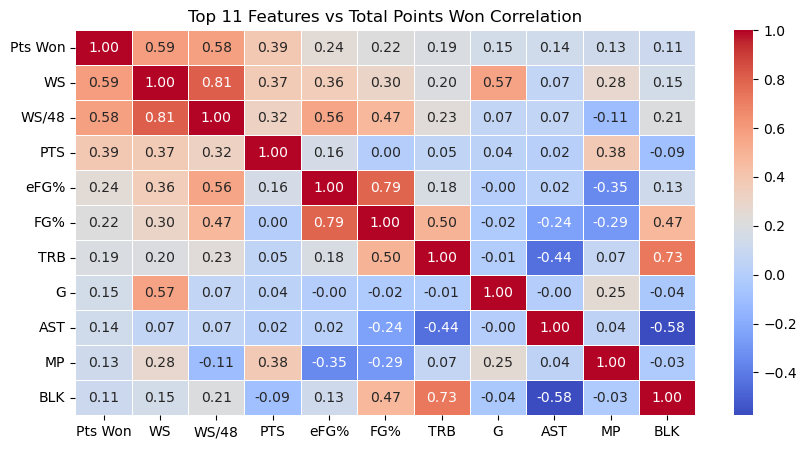

In [9]:
# Stats vs Total Points Won Correlation

correlation_heatmap(col = columns, x = target2, y = 'Total Points Won', top_n = 11, path = "Charts/Total Points Won Correlation")

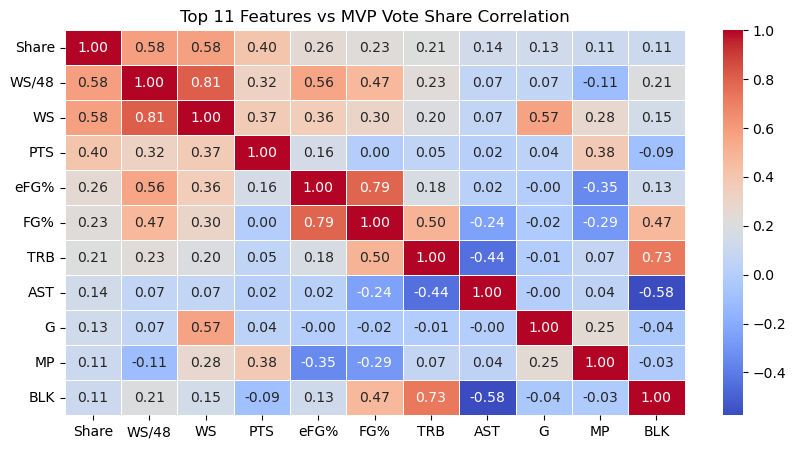

In [10]:
# Stats vs MVP Vote Share Correlation

correlation_heatmap(col = columns, x = target3, y = 'MVP Vote Share', top_n = 11, path = "Charts/MVP Vote Share Correlation")

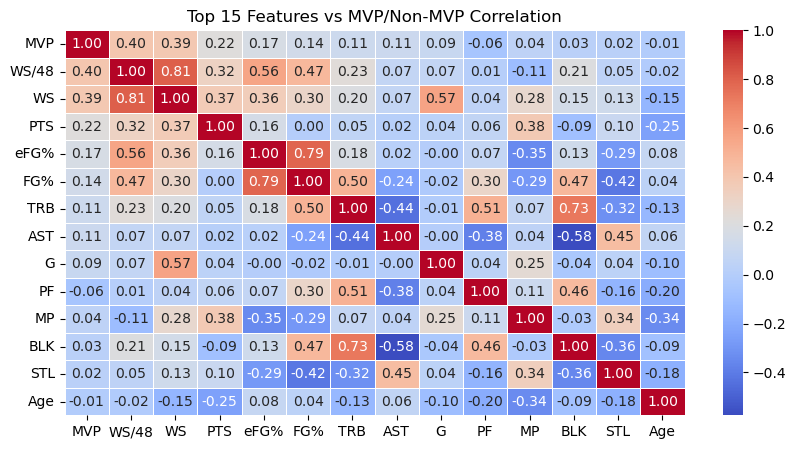

In [11]:
# All Stats vs MVP/Non-MVP Correlation

correlation_heatmap(col = columns, x = target4, y = 'MVP/Non-MVP', top_n = 15, path = "Charts/MVP Correlation")

## Building the Model

In [13]:
# Determine features and target for Stats vs MVP/Non-MVP model testing (Use top 12 stats from MVP/Non-MVP correlation)
features = ['G', 'MP', 'PTS', 'AST', 'STL', 'BLK', 'TRB', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48']

X = nba_mvp_history[features]
y = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 60
hidden_nodes_l2 = 40
hidden_nodes_l3 = 20
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 15, batch_size = 25, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

model_original = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                780       
                                                                 
 dense_5 (Dense)             (None, 40)                2440      
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,061
Trainable params: 4,061
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
12/12 [==============================] - 1s 48ms/step - loss: 0.7008 - accuracy: 0.5537 - val_loss: 0.6082 - val_accuracy: 0.6200
Epoch 2/15
12/12 [=========================

# Optimizing model using # of different layers and # of different of neurons

In [14]:
# First Attempt (Using new number of neurons and less epochs)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 100
hidden_nodes_l2 = 60
hidden_nodes_l3 = 30
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 10, batch_size = 25, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

Optimizing_1 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1300      
                                                                 
 dense_9 (Dense)             (None, 60)                6060      
                                                                 
 dense_10 (Dense)            (None, 30)                1830      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 9,221
Trainable params: 9,221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [==============================] - 1s 34ms/step - loss: 0.6758 - accuracy: 0.6208 - val_loss: 0.6348 - val_accuracy: 0.6600
Epoch 2/10
12/12 [=========================

,Loss,Accuracy
0,0.2,0.93


In [15]:
# Second Attempt (Using additional hidden layer)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 100
hidden_nodes_l2 = 80
hidden_nodes_l3 = 60
hidden_nodes_l4 = 40
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Fourth Hidden Layer
model.add(Dense(units = hidden_nodes_l4, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 10, batch_size = 25, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

Optimizing_2 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1300      
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dense_14 (Dense)            (None, 60)                4860      
                                                                 
 dense_15 (Dense)            (None, 40)                2440      
                                                                 
 dense_16 (Dense)            (None, 1)                 41        
                                                                 
Total params: 16,721
Trainable params: 16,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [==============================] 

,Loss,Accuracy
0,0.25,0.91


In [18]:
# Third Attempt (Using different number of neurons, epochs and learning rate)
from keras.optimizers import Adam

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 100
hidden_nodes_l2 = 80
hidden_nodes_l3 = 60
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 10, batch_size = 25, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

Optimizing_3 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_3

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               1300      
                                                                 
 dense_26 (Dense)            (None, 80)                8080      
                                                                 
 dense_27 (Dense)            (None, 60)                4860      
                                                                 
 dense_28 (Dense)            (None, 1)                 61        
                                                                 
Total params: 14,301
Trainable params: 14,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
12/12 [==============================] - 1s 33ms/step - loss: 0.6775 - accuracy: 0.6107 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 2/10
12/12 [=======================

,Loss,Accuracy
0,0.18,0.93


In [23]:
# Optimizing (Using different learning rate, layers and hidden nodes)
# Final Attempt
from keras.optimizers import Adam

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 100
hidden_nodes_l2 = 80
hidden_nodes_l3 = 60
hidden_nodes_l4 = 40
hidden_nodes_l5 = 30
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Fourth Hidden Layer
model.add(Dense(units = hidden_nodes_l4, activation = 'relu'))

# Fifth Hidden Layer 
model.add(Dense(units = hidden_nodes_l5, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 16, batch_size = 10, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

Optimizing_final = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_final

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               1300      
                                                                 
 dense_54 (Dense)            (None, 80)                8080      
                                                                 
 dense_55 (Dense)            (None, 60)                4860      
                                                                 
 dense_56 (Dense)            (None, 40)                2440      
                                                                 
 dense_57 (Dense)            (None, 30)                1230      
                                                                 
 dense_58 (Dense)            (None, 1)                 31        
                                                                 
Total params: 17,941
Trainable params: 17,941
Non-tra

,Loss,Accuracy
0,0.27,0.95


In [24]:
# Put all the model optimizations into one dataframe to view results

analysis = pd.concat([model_original, Optimizing_1, Optimizing_2, Optimizing_3, Optimizing_final], ignore_index = True)
analysis = analysis.rename(index = {
    0: 'Original Model',
    1: '1st Model Optimization',
    2: '2nd Model Optimization',
    3: '3rd Model Optimization',
    4: 'Final Model Optimization'
})

analysis

,Loss,Accuracy
Original Model,0.20,0.92
1st Model Optimization,0.20,0.93
2nd Model Optimization,0.25,0.91
3rd Model Optimization,0.18,0.93
Final Model Optimization,0.27,0.95


## Train the Model

## Test on new data

In [ ]:
data_23_24 = pd.read_csv("Datasets/all_nba_seasons_revised.csv")

In [ ]:
data_23_24 = data_23_24[data_23_24['Season'] == '2023-24']
data_23_24.drop(columns = ['Unnamed: 0', 'Pos'], inplace = True)
data_23_24